In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import random 
from datetime import datetime 

In [2]:
def Model1_Simulation(q1, q2, lambda_1, lambda_2, lambda_3, gamma_1, gamma_2, gamma_3, TERM):
    r1 = 1-q1
    r2 = 1-q2
    TNOW = 0  
    Q1 = 0
    Q2 = 0
    Q3 = 0 
    AQ1 = 0 
    AQ2 = 0 
    AQ3=0
    
    # Initialise number of iterations to be 0 
    iteration = 0 
    #Initialise number of arrivals, matches and abandonments to be 0 
    Matches_CE = 0
    Matches_EE = 0 
    Matches_Job = 0 
    
    Arrivals_CE = 0
    Arrivals_EE = 0 
    Arrivals_Job = 0 
    
    Abandonment_CE = 0
    Abandonment_EE = 0
    Abandonment_Job = 0 
    
    
    
    # Initalise vector to store the time 
    Time_v = []
    
    
    # Initialize event calander to be a 4d vector 
    EC= ([0]*4)
    if(lambda_1 > 0):
        EC[0] = -(np.log(1-np.random.uniform(0, 1))/lambda_1)
    else:
        EC[0] = TERM+1
    EC[1] = -(np.log(1-np.random.uniform(0, 1))/lambda_2)
    EC[2] = -(np.log(1-np.random.uniform(0, 1))/lambda_3)
    EC[3] = TERM
    EC = np.array(EC)
    
    while TNOW < TERM:
        #print(EC)
        iteration +=1
        
        # Time of next event is minimum entry in event calender
        TNEXT = EC.min()
        
        # Type of next event (index of minimum entry in event calender)
        ENEXT = EC.argmin()
        
        # Update area statistics
        AQ1 += ((TNEXT-TNOW)*Q1)
        AQ2 += ((TNEXT-TNOW)*Q2)
        AQ3 += ((TNEXT-TNOW)*Q3)
        
        # Update time vector 
        TNOW = TNEXT
        Time_v = np.append(Time_v, TNOW)
        

        # Next event is arrival of a CE
        if(ENEXT==0):
           # print('CE arrival')
            
            # Increase CE arrivals by 1 
            Arrivals_CE += 1 
            
            # Initialise m=0 to be the matchings found for this CE 
            m=0
            
            # If there are jobs to match with 
            if(Q3 > 0 ):
                
                
                
                # Loop through each job and check matching 
                for i in range(Q3):
                    
                    # Generate uniform RV for checking 
                    u = np.random.uniform(0,1)
                    
                    # if u < probability of matching 
                    if(u < (1-r1)):
                        #print('CE matches with job')
                        # CE matches with job and they both leave system 
                        m += 1 
                        Q3 -= 1 
                        
                        # Increase CE and job matches by 1
                        Matches_CE += 1 
                        Matches_Job += 1 
                        
                        # Update event calender to remove abandonment time of that job
                        EC = np.delete(EC, (4+Q1+Q2+i))
                
                        break
                
            # If there are no matches found or possible then CE joins the queue 
            if(m == 0):
              #  print('No match join queue')
                # update EC to inlude abandonment time of that CE 
                EC=np.insert(EC, (4+Q1), (TNOW-(np.log(1-np.random.uniform(0, 1))/gamma_1)))
                
                # Joins queue 
                Q1 += 1
                
                
                
            # Update EC to include next arrival time of CE
            EC[0]=TNOW -(np.log(1-np.random.uniform(0, 1))/lambda_1)
        
        
        
        # Next event is arrival of a EE
        elif(ENEXT==1):
           # print('EE arrival')
            
            # Increase EE arrivals by 1 
            Arrivals_EE += 1 
            
            # Initialise m=0 to be the matchings found for this EE 
            m=0
            
            # If there are jobs to match with 
            if(Q3 > 0 ):

                
                # Loop through each job and check matching 
                for i in range(Q3):
                    
                    # Generate uniform RV for checking 
                    u = np.random.uniform(0,1)
                    
                    # if u < probability of matching 
                    if(u < (1-r2)):
                       # print('EE matches with job')
                        # EE matches with job and they both leave system 
                        m += 1 
                        Q3 -= 1 
                        
                        # Increase EE and job matches by 1
                        Matches_EE += 1 
                        Matches_Job += 1 
                        
                        # Update event calender to remove abandonment time of that job
                        EC = np.delete(EC, (4+Q1+Q2+i))
                        break
                
            # If there are no matches found or possible then EE joins the queue 
            if(m == 0):
              #  print('No match join queue ')
                # update EC to inlude abandonment time of that EE 
                EC=np.insert(EC, (4+Q1+Q2), (TNOW-(np.log(1-np.random.uniform(0, 1))/gamma_2)))
    
                
                # Joins queue 
                Q2 += 1
                
            
                
                
            # Update EC to include next arrival time of EE
            EC[1]=TNOW-(np.log(1-np.random.uniform(0, 1))/lambda_2)
            
        # Next event is arrival of job 
        elif(ENEXT == 2):
          #  print('Job arrival')
            
            # Initialise matches to be 0 
            m = 0 
            
            # Increase arrivals by 1
            Arrivals_Job += 1
            
            # CE > EE so first check if there are matches with CE
            if(Q1 > 0):
                
                # Loop through each CE and check for a match
                for i in range(Q1):
                    
                    # Generate uniform RV for checking 
                    u = np.random.uniform(0,1)
                    
                    # if u < 1-r (probability of matching) then a match is found
                    if(u < (1-r1)):
                        
                        # Job Matches and leaves the system with the CE
                       # print('Job Matches with CE')
                        m += 1 
                        Q1 -= 1
                        
                        # Increase matches of job and CE by 1 
                        Matches_Job += 1
                        Matches_CE += 1 
                        
                        # Update event calender to remove abandonment time of the CE 
                        EC = np.delete(EC, (4+i))
                        break 
                        
            # If job didnt match with CE and there are EEs check for match
            if(Q2 > 0 and m == 0):
                
                # Loop through each EE and check for a match 
                for i in range(Q2):
                    
                    # Generate uniform RV for checking 
                    u = np.random.uniform(0,1)
                    
                    # if u < 1-2 (probability of matching) then a match is found
                    if(u < (1-r2)):
                      #  print('Job matches with EE')
                        # Job Matches and leaves the system with the EE
                        
                        m += 1 
                        Q2 -= 1
                        
                        # Increase matches of job and EE by 1 
                        Matches_Job += 1
                        Matches_EE += 1 
                        
                        # Update event calender to remove abandonment time of the EE 
                        EC = np.delete(EC, (4+Q1+i))
                        break
            # If no CE or EE to match or no match found, then job joins the job queue  
            if(m == 0):
             #   print('No match join queue')
                # Update EC to include abandonment time of the job
                EC = np.insert(EC, (4+Q1+Q2+Q3), (TNOW-(np.log(1-np.random.uniform(0, 1))/gamma_3)))
                # Job joinss job queue 
                Q3 += 1 
                
            # Update event calander to include next arrival of job 
            EC[2]=TNOW-(np.log(1-np.random.uniform(0, 1))/lambda_3)
        
        
        # Next event is abandonment of CE
        elif((ENEXT>3) and (ENEXT<=(3+Q1))):
          #  print('CE abandonment')
            # Q1 decreases by 1 
            Q1 -= 1
            # Abandonment increases by 1
            Abandonment_CE += 1
            # Remove abandonment time frmo event calendar 
            EC = np.delete(EC, ENEXT)
            
            
        # If next event is an abandonment of EE (Q2)
        elif((ENEXT>(3+Q1)) and (ENEXT<=(3+Q1+Q2))):
          #   print('EE abandonment')
            # Q2 decreases by 1 
             Q2 -= 1
            # Abandonment Increases by 1
             Abandonment_EE += 1
            # Remove abandonment time from event calendar 
             EC = np.delete(EC, ENEXT)
            #print('Q2 abandonment')
            #print(EC)
        
        # Next event is abandonment of Job (Q3)
        elif((ENEXT>(3+Q1+Q2)) and (ENEXT<=(3+Q1+Q2+Q3))):
            # Q3 decreases by 1
            Q3 -= 1
             # Abandonment increases by 1
            Abandonment_Job += 1
             # Remove abandonment time from event calendar
            EC = np.delete(EC, ENEXT)
             
        
             
    T_Q = AQ1+AQ2+AQ3  
    if(Arrivals_CE > 0):
        CEMatchRate = Matches_CE/Arrivals_CE
        CEAbandonRate = Abandonment_CE/Arrivals_CE
    else:
        CEMatchRate = 0
        CEAbandonRate = 0
    if(Arrivals_EE>0):
        EEMatchRate = Matches_EE/Arrivals_EE
        EEAbandonRate = Abandonment_EE/Arrivals_EE
    else:
        EEMatchRate = 0 
        EEAbandonRate = 0
    if(Arrivals_Job > 0):
        JobMatchRate = Matches_Job/Arrivals_Job
        JobAbandonRate = Abandonment_Job/Arrivals_Job
    else:
        JobMatchRate = 0
        JobAbandonRate = 0 
    if(Arrivals_CE +Arrivals_EE+Arrivals_Job > 0):
        TotalMatchRate = ((Matches_CE+Matches_EE+Matches_Job)/(Arrivals_CE+Arrivals_EE+Arrivals_Job))
        TotalAbandonRate = ((Abandonment_CE+Abandonment_EE+Abandonment_Job)/(Arrivals_CE+Arrivals_EE+Arrivals_Job))
    else:
        TotalMatchRate = 0
        TotalAbandonRate = 0
        
    
    
    Av_AQ1= AQ1/TERM
    Av_AQ2= AQ2/TERM
    Av_AQ3= AQ3/TERM
    Av_Total= T_Q/TERM
    

    
    return Av_AQ1, Av_AQ2, Av_AQ3, CEMatchRate, EEMatchRate, JobMatchRate, TotalMatchRate, CEAbandonRate, EEAbandonRate, JobAbandonRate, TotalAbandonRate , Av_Total



             
             

        
        
                
                        
            
                
                
        

In [4]:
print(datetime. now())
Abandonment_time = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

CE_Match_rates = []
EE_Match_rates = []
Job_Match_rates = []
Total_Match_rates = []
CE_Abandon_rates = []
EE_Abandon_rates = []
Job_Abandon_rates = []
Total_Abandon_rates = []
CE_Queue_length = []
EE_Queue_length = []
Job_Queue_length = []
Total_Queue_length = []



for i in range(len(Abandonment_time)):
    print(Abandonment_time[i])
    print(i)
    CE_Rep_m_rate = []
    EE_Rep_m_rate = []
    Job_Rep_m_rate = []
    Total_Rep_m_rate = []
    CE_Rep_a_rate = []
    EE_Rep_a_rate = []
    Job_Rep_a_rate = []
    Total_Rep_a_rate = []
    CE_Rep_q_length = []
    EE_Rep_q_length = []
    Job_Rep_q_length = []
    Total_Rep_q_length = []
    
    for j in range(10):
        print(j)
        print(datetime. now())
        rep_results=Job_sim(0.75, 0.5, 1, 1, 1, 0.1,Abandonment_time[i], 0.05, 30000)
        CE_Rep_m_rate = np.append(CE_Rep_m_rate, rep_results[3])
        EE_Rep_m_rate = np.append(EE_Rep_m_rate, rep_results[4])
        Job_Rep_m_rate = np.append(Job_Rep_m_rate, rep_results[5])
        Total_Rep_m_rate = np.append(Total_Rep_m_rate, rep_results[6])
        CE_Rep_a_rate = np.append(CE_Rep_a_rate, rep_results[7])
        EE_Rep_a_rate = np.append(EE_Rep_a_rate, rep_results[8])
        Job_Rep_a_rate = np.append(Job_Rep_a_rate, rep_results[9])
        Total_Rep_a_rate = np.append(Total_Rep_a_rate, rep_results[10])
        CE_Rep_q_length = np.append(CE_Rep_q_length, rep_results[0])
        EE_Rep_q_length = np.append(EE_Rep_q_length, rep_results[1])
        Job_Rep_q_length = np.append(Job_Rep_q_length, rep_results[2])
        Total_Rep_q_length = np.append(Total_Rep_q_length, rep_results[11])
    CE_Match_rates = np.append(CE_Match_rates, np.average(CE_Rep_m_rate))
    EE_Match_rates = np.append(EE_Match_rates, np.average(EE_Rep_m_rate))
    Job_Match_rates = np.append(Job_Match_rates, np.average(Job_Rep_m_rate))
    Total_Match_rates = np.append(Total_Match_rates, np.average(Total_Rep_m_rate))
    CE_Abandon_rates = np.append(CE_Abandon_rates, np.average(CE_Rep_a_rate))
    EE_Abandon_rates = np.append(EE_Abandon_rates, np.average(EE_Rep_a_rate))
    Job_Abandon_rates = np.append(Job_Abandon_rates, np.average(Job_Rep_a_rate))
    Total_Abandon_rates = np.append(Total_Abandon_rates, np.average(Total_Rep_a_rate))
    CE_Queue_length = np.append(CE_Queue_length, np.average(CE_Rep_q_length))
    EE_Queue_length = np.append(EE_Queue_length, np.average(EE_Rep_q_length))
    Job_Queue_length = np.append(Job_Queue_length, np.average(Job_Rep_q_length))
    Total_Queue_length = np.append(Total_Queue_length, np.average(Total_Rep_q_length))
    
    print(CE_Match_rates)
    print(EE_Match_rates)
    print(Job_Match_rates)
    print(Total_Match_rates)
    print(CE_Abandon_rates)
    print(EE_Abandon_rates)
    print(Job_Abandon_rates)
    print(Total_Abandon_rates)
    print(CE_Queue_length)
    print(EE_Queue_length)
    print(Job_Queue_length)
    print(Total_Queue_length)

    
    
print(datetime. now())   

2023-08-05 15:04:39.111537
0.1
0
0
2023-08-05 15:04:39.112865
1
2023-08-05 15:04:54.193185
2
2023-08-05 15:05:11.777254
3
2023-08-05 15:05:25.465207
4
2023-08-05 15:05:38.005865
5
2023-08-05 15:05:49.960200
6
2023-08-05 15:06:05.951190
7
2023-08-05 15:06:18.552491
8
2023-08-05 15:06:30.870952
9
2023-08-05 15:06:41.989169
[0.75534847]
[0.24495225]
[0.9989445]
[0.66637828]
[0.24458812]
[0.75478787]
[0.0010555]
[0.33351398]
[2.45153119]
[7.55169248]
[0.02348718]
[10.02671085]
0.2
1
0
2023-08-05 15:06:53.358415
1
2023-08-05 15:07:06.002482
2
2023-08-05 15:07:20.000234
3
2023-08-05 15:07:34.292216
4
2023-08-05 15:07:47.449118
5
2023-08-05 15:08:01.145212
6
2023-08-05 15:08:13.290062
7
2023-08-05 15:08:25.710270
8
2023-08-05 15:08:39.929045
9
2023-08-05 15:08:53.507632
[0.75534847 0.7637036 ]
[0.24495225 0.2301009 ]
[0.9989445 0.9960068]
[0.66637828 0.66271091]
[0.24458812 0.23623319]
[0.75478787 0.76973955]
[0.0010555 0.0039932]
[0.33351398 0.33721471]
[2.45153119 2.3689547 ]
[7.55169248 3.

1
2023-08-05 15:27:08.110338
2
2023-08-05 15:27:23.621257
3
2023-08-05 15:27:38.683094
4
2023-08-05 15:27:55.392267
5
2023-08-05 15:28:13.414076
6
2023-08-05 15:28:28.005174
7
2023-08-05 15:28:43.052421
8
2023-08-05 15:28:58.410394
9
2023-08-05 15:29:11.470346
[0.75534847 0.7637036  0.76893954 0.77643691 0.78148312 0.78299754
 0.78658568 0.78786298 0.79031931 0.78966983]
[0.24495225 0.2301009  0.22167967 0.21482317 0.21035593 0.20569788
 0.20389854 0.20097216 0.19677778 0.19606396]
[0.9989445  0.9960068  0.99305941 0.99118244 0.98981025 0.98856462
 0.98740588 0.98606718 0.98598935 0.98538313]
[0.66637828 0.66271091 0.66116605 0.66086276 0.6601011  0.65874232
 0.65984044 0.65867465 0.65692765 0.65729827]
[0.24458812 0.23623319 0.23097053 0.22347298 0.21846345 0.21694573
 0.21339434 0.21208032 0.20963065 0.21022368]
[0.75478787 0.76973955 0.77822384 0.78510351 0.7895941  0.79426902
 0.79607477 0.79899786 0.80317591 0.80390933]
[0.0010555  0.0039932  0.00692386 0.00881756 0.01017307 0.011

In [4]:
# Results 
gamma_2 = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
Abandonment_time = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
CE_Match_rates = [0.75534847, 0.7637036, 0.76893954, 0.77643691, 0.78148312, 0.78299754, 0.78658568, 0.78786298, 0.79031931, 0.78966983]
EE_Match_rates = [0.24495225, 0.2301009, 0.22167967, 0.21482317, 0.21035593, 0.20569788, 0.20389854, 0.20097216, 0.19677778, 0.19606396]
Job_Match_rates = [0.9989445, 0.9960068, 0.99305941, 0.99118244, 0.98981025, 0.98856462, 0.98740588, 0.98606718, 0.98598935, 0.98538313]
Total_Match_rates = [0.66637828, 0.66271091, 0.66116605, 0.66086276, 0.6601011, 0.65874232, 0.65984044, 0.65867465, 0.65692765, 0.65729827]
CE_Abandon_rates = [0.24458812, 0.23623319, 0.23097053, 0.22347298, 0.21846345, 0.21694573, 0.21339434, 0.21208032, 0.20963065, 0.21022368]
EE_Abandon_rates = [0.75478787, 0.76973955, 0.77822384, 0.78510351, 0.7895941, 0.79426902, 0.79607477, 0.79899786, 0.80317591, 0.80390933]
Job_Abandon_rates = [0.0010555, 0.0039932, 0.00692386, 0.00881756, 0.01017307, 0.01142538, 0.01258749, 0.01393282, 0.01398382, 0.0146002]
Total_Abandon_rates = [0.33351398, 0.33721471, 0.3387661, 0.33908279, 0.33985891, 0.34122437, 0.34014179, 0.34129649, 0.34303128, 0.34265171]
CE_Queue_length = [2.45153119, 2.3689547, 2.30497191, 2.24273208, 2.20265974, 2.17169013, 2.14244021, 2.13052305, 2.09351869, 2.09614088]
EE_Queue_length = [7.55169248, 3.8647338, 2.59289554, 1.95874721, 1.5888245, 1.32602227, 1.13646284, 0.9991029, 0.89554879, 0.80357104]
Job_Queue_length = [0.02348718, 0.08156304, 0.13263752, 0.17739935, 0.20614507, 0.23215081, 0.25792676, 0.27663283, 0.28534102, 0.29762233]
Total_Queue_length = [10.02671085, 6.31525154, 5.03050496, 4.37887864, 3.99762931, 3.72986321, 3.53682982, 3.40625879, 3.2744085, 3.19733424]


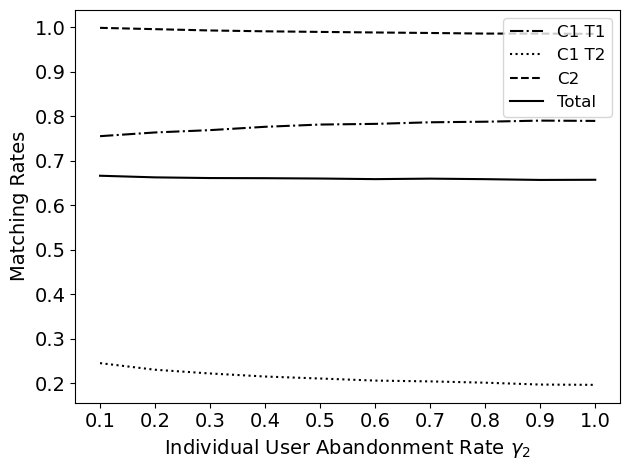

In [5]:
plt.xlabel(r'Individual User Abandonment Rate $\gamma_2$', fontsize=14)
plt.ylabel('Matching Rates', fontsize=14)
plt.plot(Abandonment_time, CE_Match_rates, linestyle='dashdot', label = 'C1 T1', color='black')
plt.plot(Abandonment_time, EE_Match_rates, linestyle='dotted', label = 'C1 T2', color='black')
plt.plot(Abandonment_time, Job_Match_rates,  linestyle='dashed', label = 'C2', color='black')
plt.plot(Abandonment_time, Total_Match_rates, linestyle='solid', label = 'Total', color='black')
plt.xticks(gamma_2, fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=12)
plt.tight_layout()
plt.savefig('Exp4_Match.png')
plt.show()

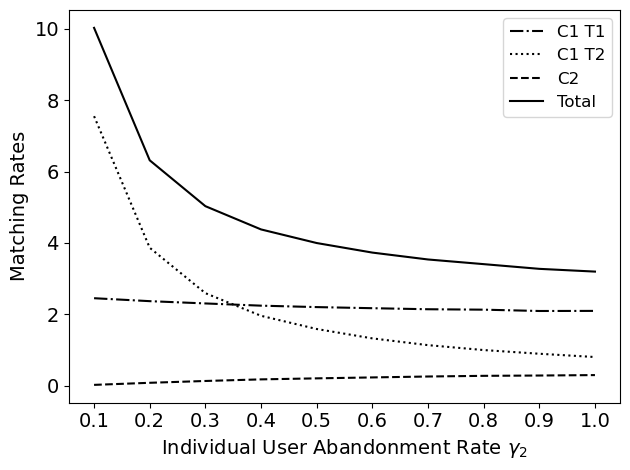

In [6]:
plt.xlabel(r'Individual User Abandonment Rate $\gamma_2$', fontsize=14)
plt.ylabel('Matching Rates', fontsize=14)
plt.plot(Abandonment_time, CE_Queue_length, linestyle='dashdot', label = 'C1 T1', color='black')
plt.plot(Abandonment_time, EE_Queue_length, linestyle='dotted', label = 'C1 T2', color='black')
plt.plot(Abandonment_time, Job_Queue_length,  linestyle='dashed', label = 'C2', color='black')
plt.plot(Abandonment_time, Total_Queue_length, linestyle='solid', label = 'Total', color='black')
plt.xticks(gamma_2, fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=12)
plt.tight_layout()
plt.savefig('Exp4_Queue.png')
plt.show()

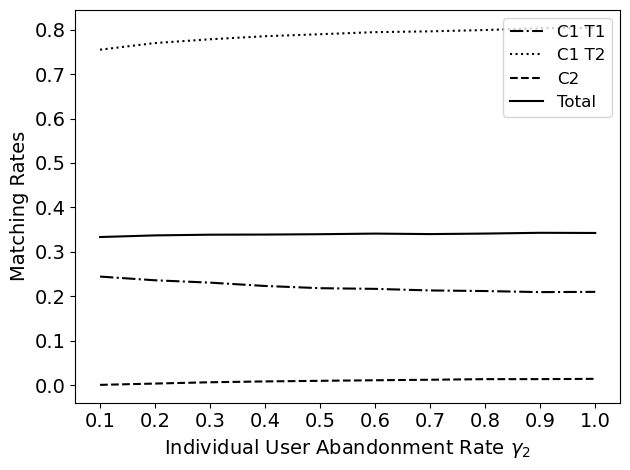

In [9]:
plt.xlabel(r'Individual User Abandonment Rate $\gamma_2$', fontsize=14)
plt.ylabel('Matching Rates', fontsize=14)
plt.plot(Abandonment_time, CE_Abandon_rates, linestyle='dashdot', label = 'C1 T1', color='black')
plt.plot(Abandonment_time, EE_Abandon_rates, linestyle='dotted', label = 'C1 T2', color='black')
plt.plot(Abandonment_time, Job_Abandon_rates, linestyle='dashed', label = 'C2', color='black')
plt.plot(Abandonment_time, Total_Abandon_rates, linestyle='solid', label = 'Total', color='black')
plt.xticks(gamma_2, fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=12)
plt.tight_layout()
plt.savefig('Exp4_Abandon.png')
plt.show()


